<a href="https://colab.research.google.com/github/AndiKotak/UAS-KecerdasanBuatan/blob/main/classification_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import pandas as pd

In [13]:
dataset = pd.read_csv("/content/drive/MyDrive/Kecerdasan Buatan/WineQT.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [14]:
new_dataset = dataset.drop("Id", axis=1)

<Axes: >

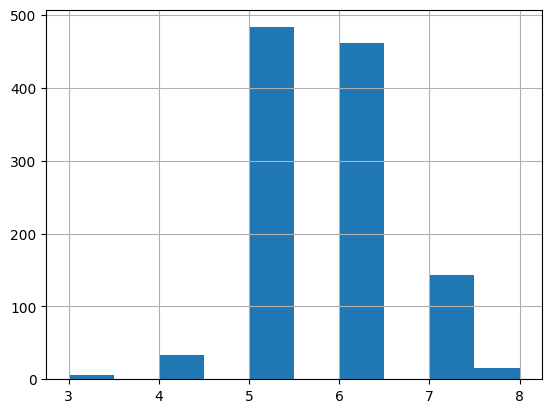

In [15]:
new_dataset["quality"].hist()

As we can see,Wine qualities are rated from 3-8, so here rating >5 = good wine

In [16]:
y = new_dataset["quality"] >5
y

0       False
1       False
2       False
3        True
4       False
        ...  
1138     True
1139     True
1140    False
1141     True
1142    False
Name: quality, Length: 1143, dtype: bool

In [17]:
X = new_dataset.iloc[:,:-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


# Train test split

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
x_train, x_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [20]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
1095,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1130,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
860,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5


Scale them and transform

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_transform = scaler.fit_transform(x_train)
scaled_x_transform

array([[ 0.1426802 , -1.40273053,  1.5096933 , ..., -0.09314751,
         0.56821234,  0.05661327],
       [ 0.96843134, -1.17920341,  1.5096933 , ..., -1.07474038,
         0.4477703 ,  0.89445566],
       [ 0.3786091 , -1.23508519,  0.4833938 , ...,  0.56124774,
         0.20688622,  1.26683005],
       ...,
       [-0.50612428, -1.01155806,  0.32944888, ...,  0.29948964,
        -0.33510296,  1.35992365],
       [-0.21121315,  0.21784112,  0.22681893, ..., -0.15858703,
         0.20688622, -0.87432272],
       [-0.44714205, -0.06156778,  0.6886537 , ..., -0.35490561,
        -0.09421888,  1.26683005]])

In [22]:
scaled_x_test = scaler.transform(x_test)
scaled_x_test

array([[-0.86001763,  0.44136825, -1.1586854 , ...,  0.69212679,
        -0.33510296, -0.87432272],
       [-0.8010354 ,  1.72664922, -0.28633082, ...,  1.41196156,
         0.38754928, -1.12257232],
       [-0.74205318,  0.2737229 , -0.7481656 , ...,  0.82300584,
        -1.0577552 ,  0.05661327],
       ...,
       [-0.86001763,  1.36341764, -1.3639453 , ...,  0.88844537,
        -0.57598704,  0.24280046],
       [ 1.02741357, -0.22921313, -0.3376458 , ..., -1.00930086,
         0.20688622, -1.15360352],
       [ 1.97112917, -0.3130358 ,  0.6886537 , ..., -1.59825658,
        -0.03399786, -0.37782353]])

In [23]:
from sklearn.svm import SVC
#svc is a support vector machine algorithm

In [24]:
svc_clf = SVC()

In [25]:
svc_clf.fit(scaled_x_transform, y_train)

SVC()

making predictions

In [26]:
svc_clf_pred = svc_clf.predict(scaled_x_test)
svc_clf_pred

array([False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False, False, False,  True, False,  True,
        True,  True,

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svc_clf_pred)

array([[ 73,  29],
       [ 25, 102]])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test, svc_clf_pred)

0.7641921397379913

In [29]:
recall_score(y_test, svc_clf_pred)

0.8031496062992126

In [30]:
precision_score(y_test, svc_clf_pred)

0.7786259541984732

In [31]:
import matplotlib.pyplot as plt
confusion_matrix(y_test, svc_clf_pred)

array([[ 73,  29],
       [ 25, 102]])

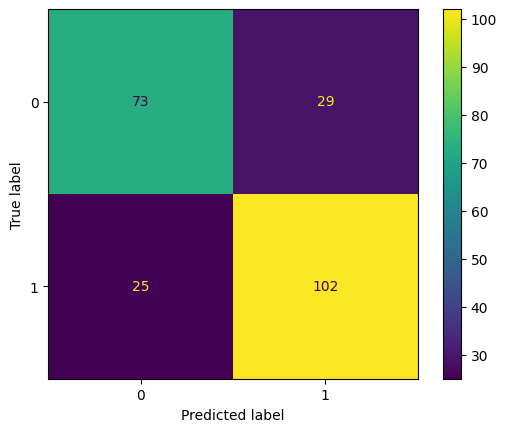

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svc_clf_pred))
disp.plot()

In [33]:
def algo_accuracy(y_test, predictions):
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)


    return accuracy, precision, recall

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming 'scaled_x_transform' is your scaled training data and 'y_train' is your training labels

param_grid = [
    {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
]

# Create an instance of SVM classifier
svc_clf = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svc_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(scaled_x_transform, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}],
             return_train_score=True, scoring='accuracy')

I did chatgpt since my previous code had errors :(

Parameter Grid (param_grid):

Two dictionaries in the param_grid list:
The first dictionary tests combinations of C (regularization parameter), gamma (kernel coefficient), and kernel ('rbf' for radial basis function).

The second dictionary tests combinations of C with kernel set to 'linear'.

In [37]:
svc_clf = grid_search.best_estimator_
svc_clf

SVC(C=10, gamma=0.01)

In [36]:
svc_clf_predictions = svc_clf.predict(scaled_x_test)
svc_clf_predictions

array([False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True,

In [38]:
algo_accuracy(y_test, svc_clf_predictions)

(0.7641921397379913, 0.7829457364341085, 0.7952755905511811)

previous acores:
accuracy_score = 76
recall = 80
precision = 77 ,
precision increased , recall decreased

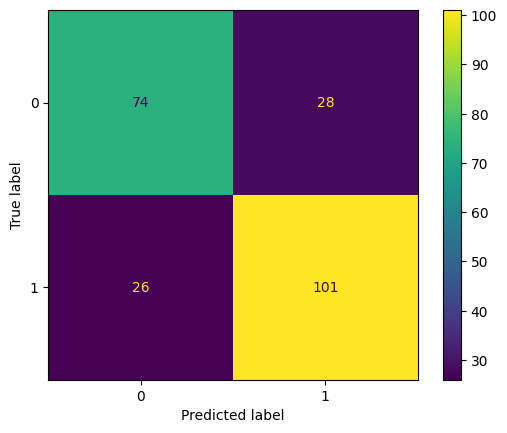

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svc_clf_predictions))
disp.plot()

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming 'scaled_x_transform' is your scaled training data and 'y_train' is your training labels

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Create an instance of RandomForestClassifier
rf_clf = RandomForestClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(scaled_x_transform, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [41]:
rf_clf = grid_search.best_estimator_
rf_clf

RandomForestClassifier(max_features=4, n_estimators=30)

In [42]:
rf_clf_predictions = rf_clf.predict(scaled_x_test)
rf_clf_predictions

array([False,  True, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
        True,  True,

In [43]:
algo_accuracy(y_test, rf_clf_predictions)

(0.7903930131004366, 0.8264462809917356, 0.7874015748031497)

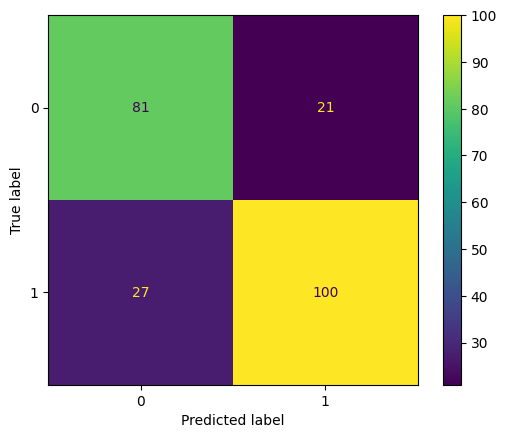

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, rf_clf_predictions))
disp.plot()